## Import the Model

In [23]:
import sys
sys.path.append('../')

import src.TagModel
import src.Auth
import numpy as np
import matplotlib.pyplot as plt 

### Run the Model

In [37]:
m, n = 18, 9  # number of messages and tags
p, q = 0.8, 1 # probability of a message and probability of a tag being correct
varInfo = src.TagModel.math_model(M_size=m, 
                                  T_size=n, 
                                  p=p, q=q, 
                                  TagEveryMessage=False, 
                                  AtLeastOnce=False, 
                                  EquivalentA=True)

Set parameter TimeLimit to value 21600
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6192 rows, 6490 columns and 18819 nonzeros
Model fingerprint: 0xcf61e1bc
Variable types: 3079 continuous, 3411 integer (3411 binary)
Coefficient statistics:
  Matrix range     [2e-02, 2e+01]
  Objective range  [2e-02, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 3240 rows and 3249 columns
Presolve time: 0.02s
Presolved: 2952 rows, 3241 columns, 12168 nonzeros
Variable types: 1 continuous, 3240 integer (3240 binary)

Root relaxation: objective 3.196225e+02, 3317 iterations, 0.02 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

 

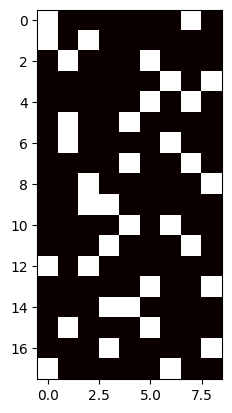

In [38]:
K = src.TagModel.get_K(varInfo, m, n)
#heatmap
plt.imshow(K, cmap= 'hot')
# plt.colorbar()
plt.show()

In [39]:
print(src.Auth.validate(src.Auth.k, np.array([p]*18), np.array([q]*9)))
print(src.Auth.Strength_Number(np.array(src.Auth.k,dtype=int)))

L = src.Auth.Latency(np.array(src.Auth.k,dtype=int), np.ones(m), np.ones(n))
print(np.average(L))
print(L)



[0.774144 0.774144 0.774144 0.774144 0.774144 0.774144 0.774144 0.774144
 0.774144 0.774144 0.774144 0.774144 0.774144 0.774144 0.774144 0.774144
 0.774144 0.774144]
[ 0  3  6  9 13 17]
1.0
[2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0]


In [33]:
A = src.Auth.validate(K, np.array([p]*m), np.array([q]*n))
print('average A:',np.average(A))
print ("A = ", A)

L = src.Auth.Latency(K, np.ones(m), np.ones(n))
print('average L:', np.average(L))
print("L =", L)

print("Rows that breaks the verification",src.Auth.Strength_Number(np.array(K,dtype=int)))

average A: 0.8192000000000003
A =  [0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192
 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192 0.8192]
average L: 6.777777777777778
L = [17 16 13 14 11 10  9  7  4  3  4  5  5  2  2  0  0  0]
Rows that breaks the verification [ 0  1  2  3 14]


Case 1: Make the result all equal to each other.

Case 1.5: Priorotize the messages for the differet application like emergency 

Case 2: Add a new constraint that include a value for the E(A). 

describe the trends of the results.